In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [29]:
covid_data = pd.read_csv("C:/Users/HP/OneDrive/Desktop/dataset/covid_19_india.csv")

covid_data.head()


,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/2020,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/2020,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/2020,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/2020,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/2020,6:00 PM,Kerala,3,0,0,0,3


In [30]:
covid_data['Date'] = pd.to_datetime(covid_data['Date'], format='%d/%m/%Y')

covid_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18047 entries, 0 to 18046
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Sno                       18047 non-null  int64         
 1   Date                      18047 non-null  datetime64[ns]
 2   Time                      18047 non-null  object        
 3   State/UnionTerritory      18047 non-null  object        
 4   ConfirmedIndianNational   18047 non-null  object        
 5   ConfirmedForeignNational  18047 non-null  object        
 6   Cured                     18047 non-null  int64         
 7   Deaths                    18047 non-null  int64         
 8   Confirmed                 18047 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 1.2+ MB


In [31]:
covid_data

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...
18042,18106,2021-08-11,8:00 AM,Telangana,-,-,638410,3831,650353
18043,18107,2021-08-11,8:00 AM,Tripura,-,-,77811,773,80660
18044,18108,2021-08-11,8:00 AM,Uttarakhand,-,-,334650,7368,342462
18045,18109,2021-08-11,8:00 AM,Uttar Pradesh,-,-,1685492,22775,1708812


In [32]:
missing_values = covid_data.isnull().sum()
print(missing_values)


Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64


In [33]:
covid_data.describe()


,Sno,Date,Cured,Deaths,Confirmed
count,18047.000000,18047,1.804700e+04,18047.000000,1.804700e+04
mean,9076.418130,2020-12-01 12:00:11.968748288,2.796102e+05,4066.548734,3.020631e+05
min,1.000000,2020-01-30 00:00:00,0.000000e+00,0.000000,0.000000e+00
25%,4575.500000,2020-07-28 00:00:00,3.392000e+03,34.000000,4.387000e+03
50%,9087.000000,2020-12-04 00:00:00,3.392400e+04,598.000000,4.026900e+04
75%,13598.500000,2021-04-08 00:00:00,2.806790e+05,3669.500000,3.012805e+05
max,18110.000000,2021-08-11 00:00:00,6.159676e+06,134201.000000,6.363442e+06
std,5224.916438,NaN,6.157425e+05,10935.489348,6.570604e+05


In [34]:
statewise_data = covid_data.groupby('State/UnionTerritory').agg({
    'Confirmed': 'max',
    'Cured': 'max',
    'Deaths': 'max'
}).reset_index()

statewise_data.sort_values(by='Confirmed', ascending=False)


,State/UnionTerritory,Confirmed,Cured,Deaths
22,Maharashtra,6363442,6159676,134201
18,Kerala,3586693,3396184,18004
17,Karnataka,2921049,2861499,36848
16,Karanataka,2885238,2821491,36197
32,Tamil Nadu,2579130,2524400,34367
1,Andhra Pradesh,1985182,1952736,13564
36,Uttar Pradesh,1708812,1685492,22775
38,West Bengal,1534999,1506532,18252
8,Delhi,1436852,1411280,25068
6,Chhattisgarh,1003356,988189,13544


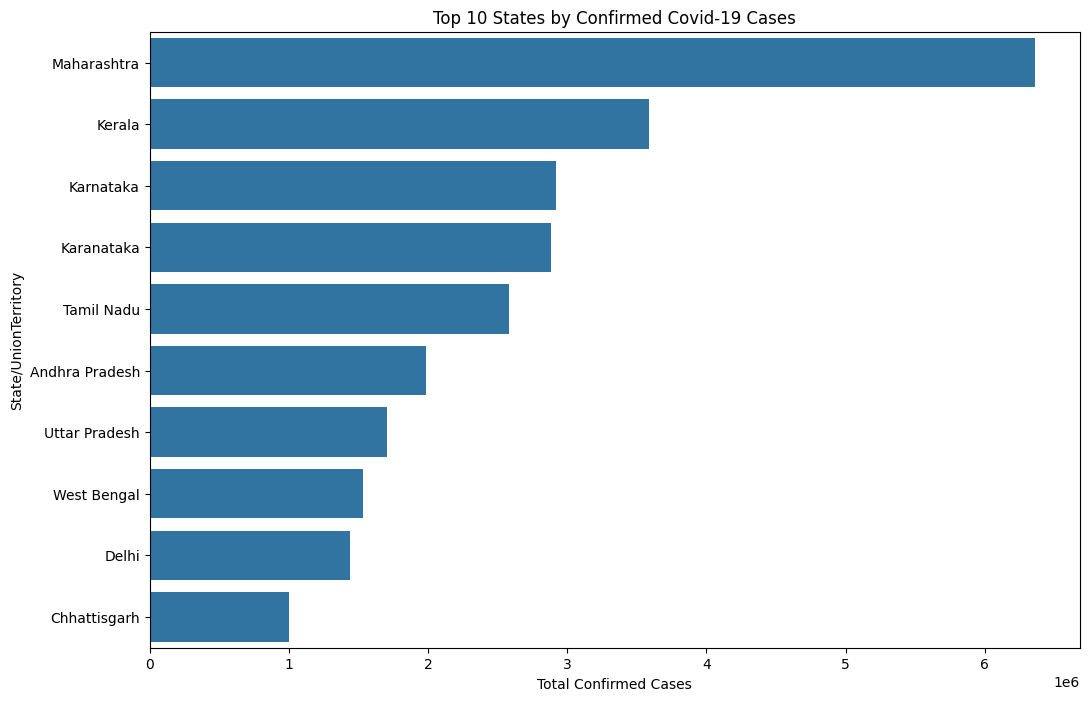

In [35]:
plt.figure(figsize=(12,8))
sns.barplot(x='Confirmed', y='State/UnionTerritory', data=statewise_data.sort_values(by='Confirmed', ascending=False).head(10))
plt.title('Top 10 States by Confirmed Covid-19 Cases')
plt.xlabel('Total Confirmed Cases')
plt.ylabel('State/UnionTerritory')
plt.show()


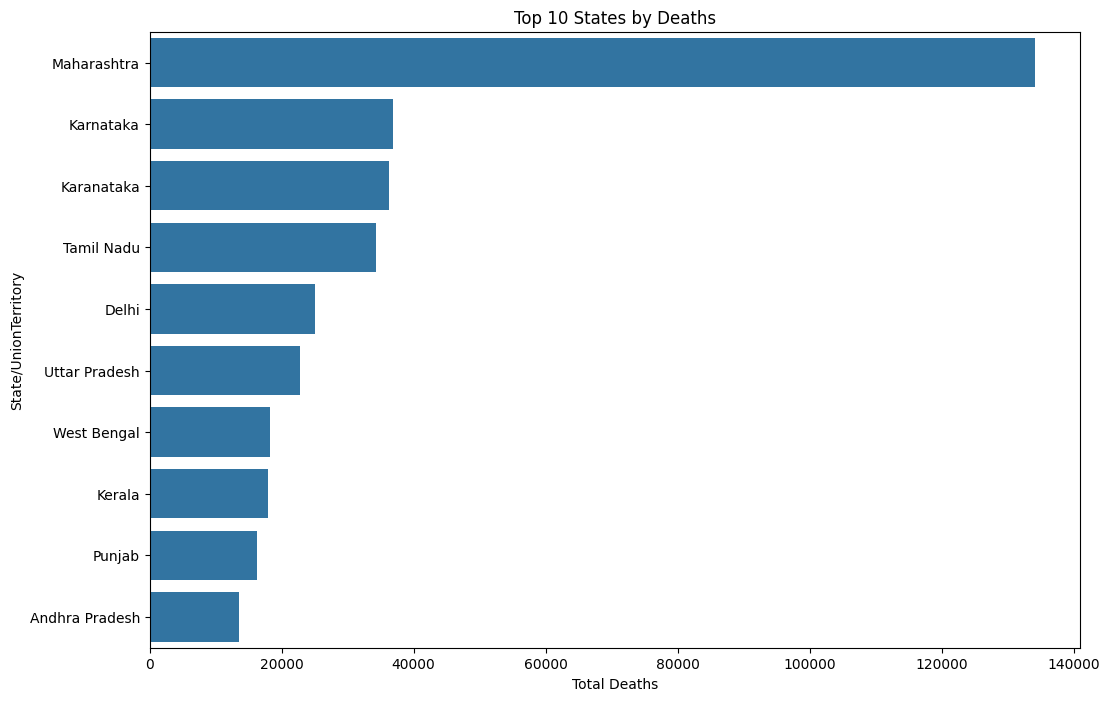

In [36]:
plt.figure(figsize=(12,8))
sns.barplot(x='Deaths', y='State/UnionTerritory', data=statewise_data.sort_values(by='Deaths', ascending=False).head(10))
plt.title('Top 10 States by Deaths')
plt.xlabel('Total Deaths')
plt.ylabel('State/UnionTerritory')
plt.show()


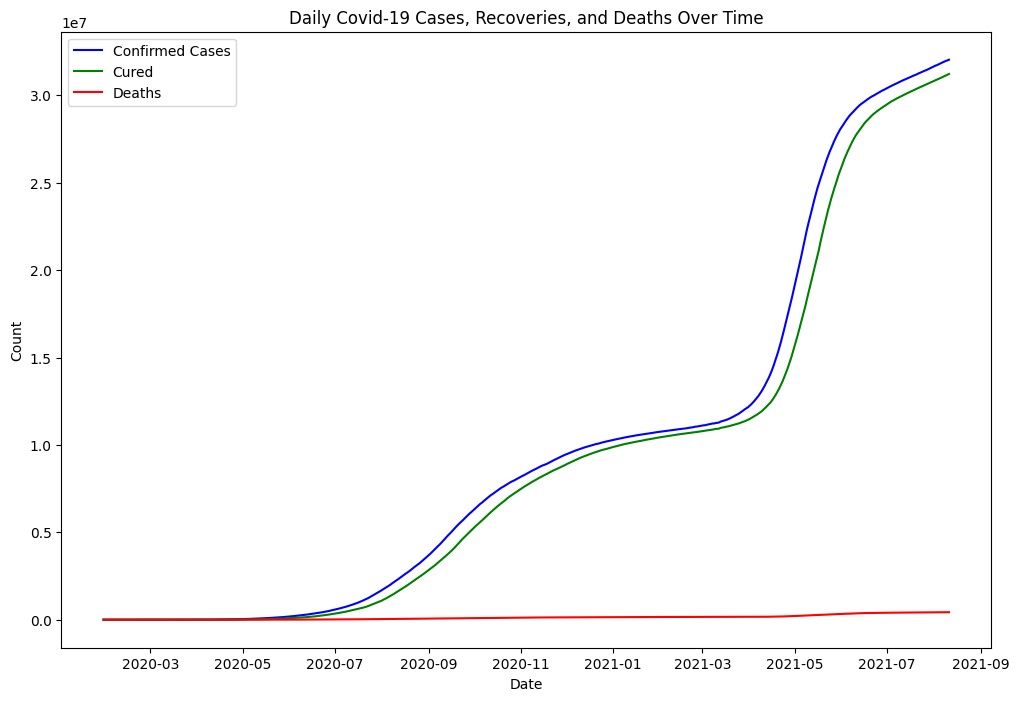

In [37]:
daily_data = covid_data.groupby('Date').agg({
    'Confirmed': 'sum',
    'Cured': 'sum',
    'Deaths': 'sum'
}).reset_index()

# Plot daily trends
plt.figure(figsize=(12,8))
plt.plot(daily_data['Date'], daily_data['Confirmed'], label='Confirmed Cases', color='blue')
plt.plot(daily_data['Date'], daily_data['Cured'], label='Cured', color='green')
plt.plot(daily_data['Date'], daily_data['Deaths'], label='Deaths', color='red')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Daily Covid-19 Cases, Recoveries, and Deaths Over Time')
plt.legend()
plt.show()


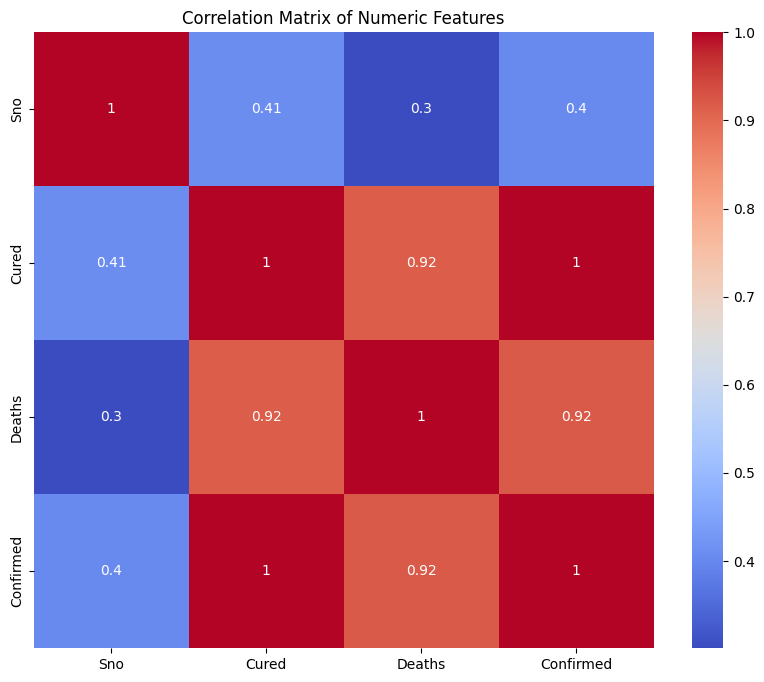

In [38]:
numeric_data = covid_data.select_dtypes(include=[np.number])

correlation_matrix = numeric_data.corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features')
plt.show()
